## Project Phase 2 - Classificiation using Neural Network

Group Members:
Asim Waheed: 20100237
Omer Arshad: 20100194
Khawaja Umair ul Hassan: 20100286

In this notebook we will be using Keras to build a Neural Network in order to do the classification for us.

In [100]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')
data_dir = '/content/drive/My Drive/Colab/DataMining_Project/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import tensorflow as tf
from keras.models import Model
from keras.models import Model
from keras.layers import Dense, Input, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping, CSVLogger, ReduceLROnPlateau, TensorBoard
import keras.backend as K
import keras

from sklearn.model_selection import train_test_split

tf.test.gpu_device_name()

'/device:GPU:0'

### Load Dataset

In [0]:
X = pd.read_pickle(data_dir+'X.pkl')
Y = pd.read_pickle(data_dir+'Y.pkl')

In [0]:
X.head()

,order_number,add_to_cart_order,department_id,days_since_prior_order,order_hour_of_day,order_dow,aisle_id,product_id
0,1,30,19,0.0,15,1,61,1
1,4,1,19,14.0,14,1,61,1
2,18,13,19,7.0,22,0,61,1
3,2,5,19,20.0,12,2,61,1
4,7,12,19,15.0,5,3,61,1


In [0]:
Y.head()

0    0
1    1
2    1
3    0
4    0
Name: reordered, dtype: int64

In [0]:
X_arr = X.to_numpy()
Y_arr = Y.to_numpy()

Y_categorical = to_categorical(Y_arr, 2, 'int64')
# Keras works bettert with Numpy arrays

In [0]:
X_arr.shape

(9737270, 8)

In [0]:
Y_categorical.shape

(9737270, 2)

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X_arr, Y_categorical, test_size=0.3, random_state=42) 

### Make and Train the Model

We will be using the Keras Functional API to make a 3-layer neural network. We'll be using several callbacks to make sure the model is efficient. We are using a checkpoint callback that allows the model to pick the best weights from many epochs rather than just using the latest epochs. Similarly we'll be using a CSVLogger to check the model in detail. Lastly, ReduceLROnPlateau allows us to set a higher learning rate initially so that it can converge quicker without worrying about it not being able to fine-tune when it starts to get closer to a minima.

In [0]:
model_name = 'instaCartModel'

checkpoint = ModelCheckpoint(data_dir+model_name+'/'+model_name+'-{epoch:02d}-{val_loss:.2f}.h5', 
                             monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
cvslogger = CSVLogger(data_dir+model_name+'/logs.csv', separator=',', append=True)
reducelr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.000001)


callbacks = [checkpoint, cvslogger, reducelr]

##### Hyperparameters:

In [0]:
num_classes = 2
num_features = 8
epochs = 25
batch_size = 3072

##### Actual Model

In [0]:
inp = Input(shape=(num_features,), name='input_im')
dense1 = Dense(128, activation='relu')(inp)
batch_norm1 = BatchNormalization()(dense1)
dense2 = Dense(256, activation='relu')(batch_norm1)
batch_norm2 = BatchNormalization()(dense2)
dense3 = Dense(128, activation='relu')(batch_norm2)
batch_norm3 = BatchNormalization()(dense3)
output = Dense(num_classes, activation='softmax')(batch_norm3)

model = Model(inputs=inp, outputs=output)

In [0]:
if not os.path.exists(data_dir+model_name):
    os.mkdir(data_dir+model_name)
   
adam = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', 
              optimizer=adam, 
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_im (InputLayer)        (None, 8)                 0         
_________________________________________________________________
dense_45 (Dense)             (None, 128)               1152      
_________________________________________________________________
batch_normalization_34 (Batc (None, 128)               512       
_________________________________________________________________
dense_46 (Dense)             (None, 256)               33024     
_________________________________________________________________
batch_normalization_35 (Batc (None, 256)               1024      
_________________________________________________________________
dense_47 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_36 (Batc (None, 128)               512       
__________

In the output below even the first val_loss is low, this is because of the callbacks. We ran the model multiple times by changing some of the hyperparameters and each time instead of starting from scratch it used the previously learned best model and then improved it further. Because of this the average accuracy slowly gets better

In [90]:
model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_split = 0.2, callbacks = callbacks)

Train on 5452871 samples, validate on 1363218 samples
Epoch 1/25
5452871/5452871 [==============================] - 18s 3us/step - loss: 0.5326 - acc: 0.7260 - val_loss: 0.5319 - val_acc: 0.7266

Epoch 00001: val_loss did not improve from 0.53189
Epoch 2/25
5452871/5452871 [==============================] - 19s 3us/step - loss: 0.5326 - acc: 0.7261 - val_loss: 0.5320 - val_acc: 0.7265

Epoch 00002: val_loss did not improve from 0.53189
Epoch 3/25
5452871/5452871 [==============================] - 18s 3us/step - loss: 0.5326 - acc: 0.7260 - val_loss: 0.5319 - val_acc: 0.7266

Epoch 00003: val_loss did not improve from 0.53189
Epoch 4/25
5452871/5452871 [==============================] - 17s 3us/step - loss: 0.5326 - acc: 0.7261 - val_loss: 0.5319 - val_acc: 0.7265

Epoch 00004: val_loss did not improve from 0.53189
Epoch 5/25
5452871/5452871 [==============================] - 18s 3us/step - loss: 0.5326 - acc: 0.7260 - val_loss: 0.5320 - val_acc: 0.7265

Epoch 00005: val_loss did not im

In [0]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

In [0]:
from sklearn.metrics import accuracy_score

Y_pred = model.predict(X_test)

In [96]:
Y_pred_noncategorical = np.argmax(Y_pred, axis=1)
Y_test_noncategorical = np.argmax(Y_test, axis=1)

print(Y_pred.shape)
print(Y_pred_noncategorical.shape)

(2921181, 2)
(2921181,)


In [98]:
accuracy = accuracy_score(Y_test_noncategorical, Y_pred_noncategorical)
accuracy

0.7267423689254449

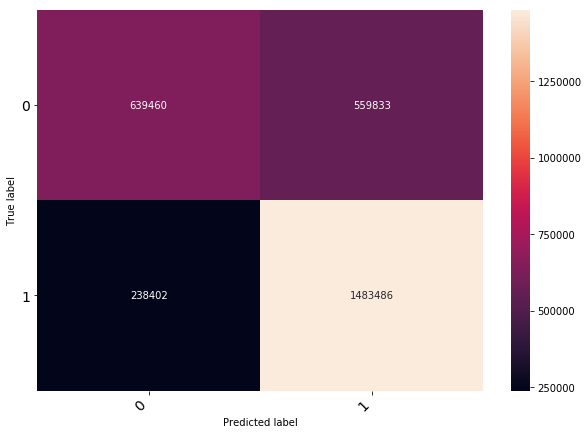

In [101]:
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(Y_test_noncategorical, Y_pred_noncategorical)
fig = print_confusion_matrix(conf_matrix,[0,1])

The accuracy of the neural network is better than the other models that we trained (can be seen in the other notebooks). In terms of perceptibility to class imbalance, the neural network does a much better job than the Random Forest, but a slightly worse job than Logistic Regression. This could be because Keras uses the validation set as well as the training set to figure out how well the model is performing. Because this is the best model, we will be using this in order to make our final predictions.

### Making the Predictions

In [103]:
all_data = pd.read_pickle(data_dir+"all_data.pkl")
all_data.fillna(0)

print(all_data.head())

   product_id                product_name  aisle_id  department_id  \
0           1  Chocolate Sandwich Cookies        61             19   
1           1  Chocolate Sandwich Cookies        61             19   
2           1  Chocolate Sandwich Cookies        61             19   
3           1  Chocolate Sandwich Cookies        61             19   
4           1  Chocolate Sandwich Cookies        61             19   

           aisle department  order_id  add_to_cart_order  reordered  user_id  \
0  cookies cakes     snacks      9273                 30          0    50005   
1  cookies cakes     snacks     19479                  5          0   110984   
2  cookies cakes     snacks     19989                  1          0     4122   
3  cookies cakes     snacks     23202                  3          0   162394   
4  cookies cakes     snacks     24760                  5          1   205157   

  eval_set  order_number  order_dow  order_hour_of_day  days_since_prior_order  
0    prior       

In [109]:
features = ['order_number', 'add_to_cart_order', 'department_id', 'days_since_prior_order', 'order_hour_of_day', 'order_dow', 'aisle_id', 'product_id']

X_to_pred = all_data[features]
X_to_pred.head()

,order_number,add_to_cart_order,department_id,days_since_prior_order,order_hour_of_day,order_dow,aisle_id,product_id
0,1,30,19,NaN,15,1,61,1
1,2,5,19,20.0,12,2,61,1
2,11,1,19,8.0,7,2,61,1
3,2,3,19,7.0,12,3,61,1
4,11,5,19,25.0,17,5,61,1


In [110]:
order_ids = all_data['order_id']
order_ids.head()

0     9273
1    19479
2    19989
3    23202
4    24760
Name: order_id, dtype: int64

In [111]:
products = all_data['product_id']
products.head()

0    1
1    1
2    1
3    1
4    1
Name: product_id, dtype: int64

In [0]:
X_to_pred_arr = X_to_pred.to_numpy()

In [113]:
Y_final_predictions_categorical = model.predict(X_to_pred_arr)

Y_final_predictions_categorical.shape

(9732316, 2)

In [115]:
Y_final = np.argmax(Y_final_predictions_categorical, axis=1)

Y_final.shape

(9732316,)

In [125]:
Y_Series = pd.DataFrame(Y_final, columns=['reordered'])

Y_Series.shape

(9732316, 1)

In [128]:
submission_df = pd.concat([order_ids, products, Y_Series], axis=1)

print(submission_df.head())
print(submission_df.shape)

   order_id  product_id  reordered
0      9273           1          0
1     19479           1          0
2     19989           1          1
3     23202           1          0
4     24760           1          1
(9732316, 3)


In [131]:
final_submission = submission_df[submission_df['reordered'] == 1][['order_id','product_id']]
final_submission.head()

,order_id,product_id
2,19989,1
4,24760,1
5,44326,1
6,47122,1
8,56396,1


In [0]:
final_submission.to_csv(data_dir+"submission.csv")